   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 12.9 MB/s eta 0:00:00


Saving UAS AI.pptx to UAS AI.pptx


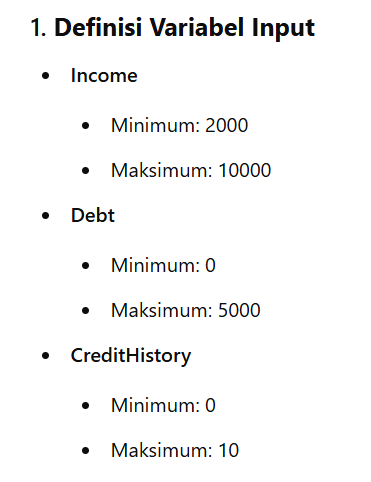

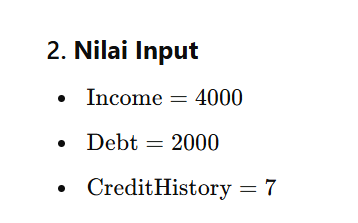

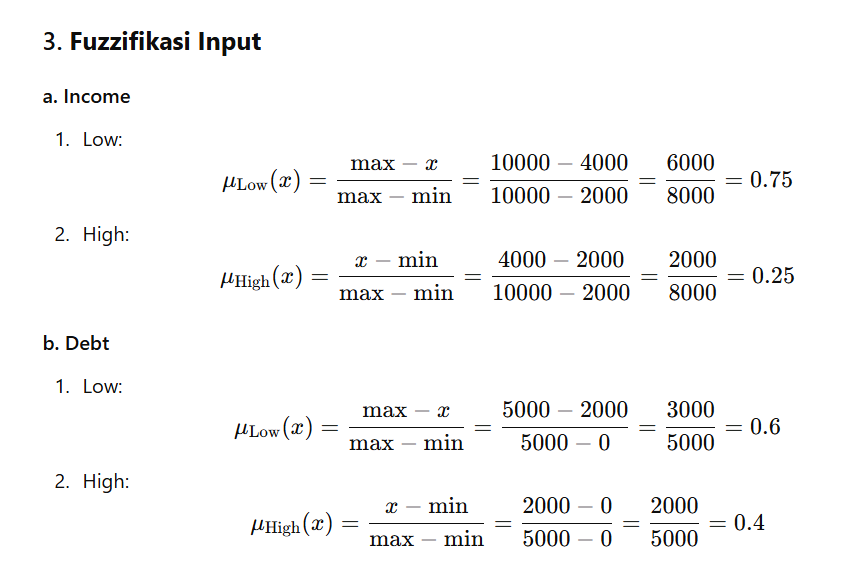

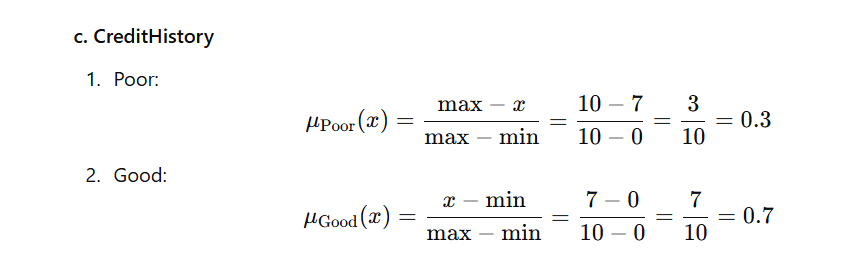

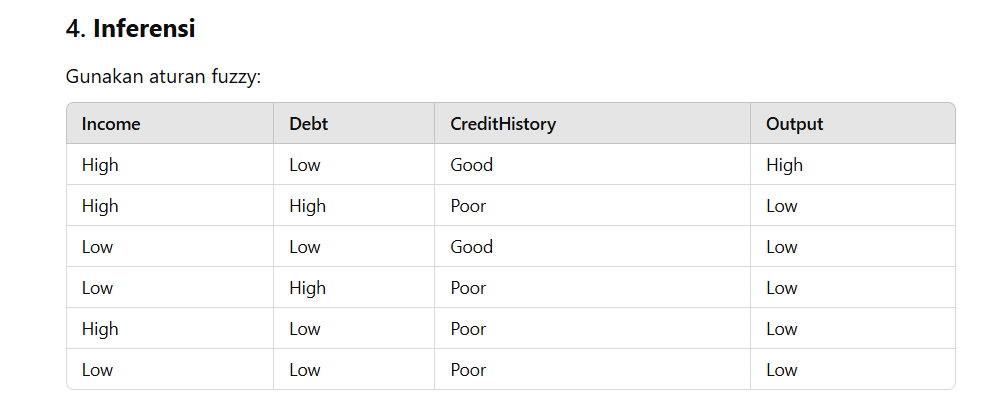

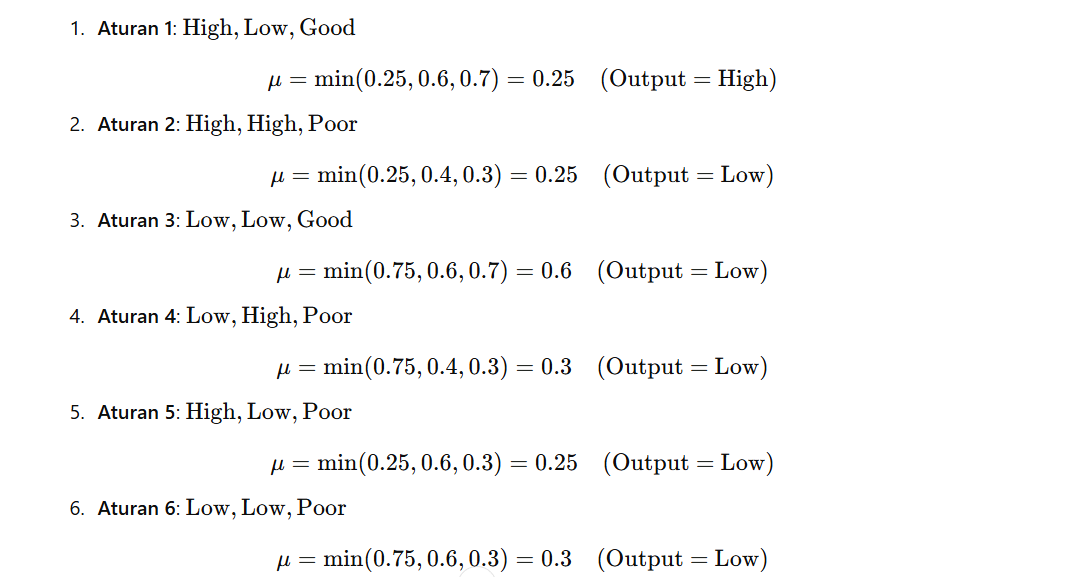

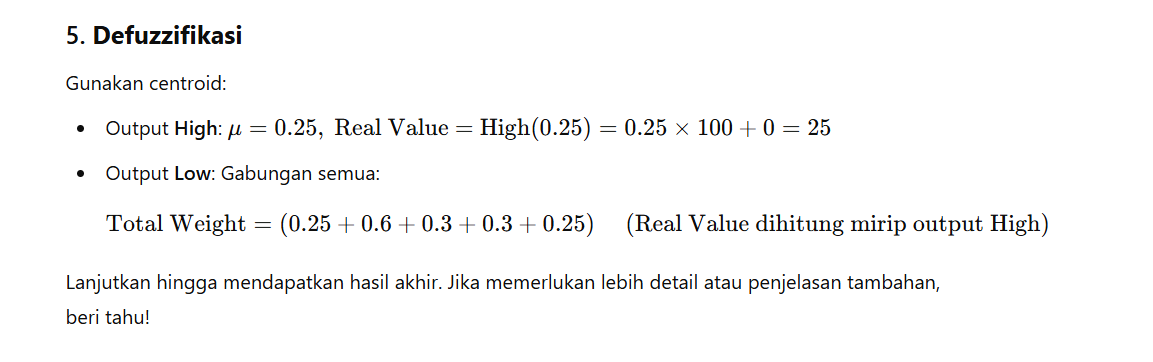

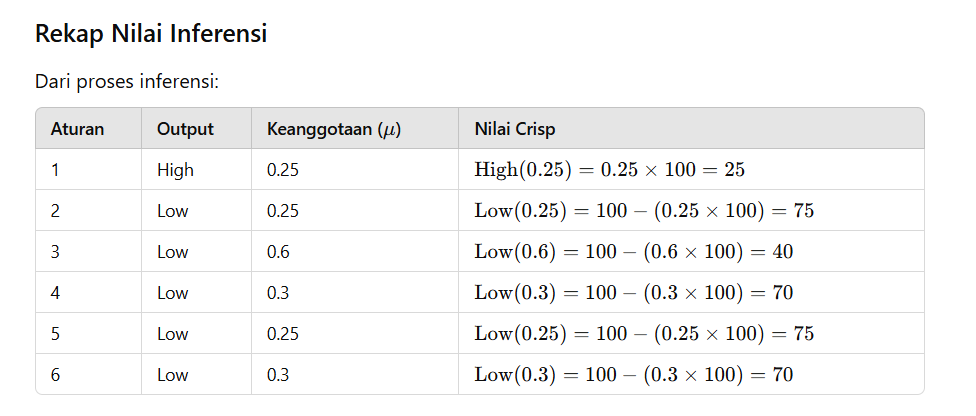

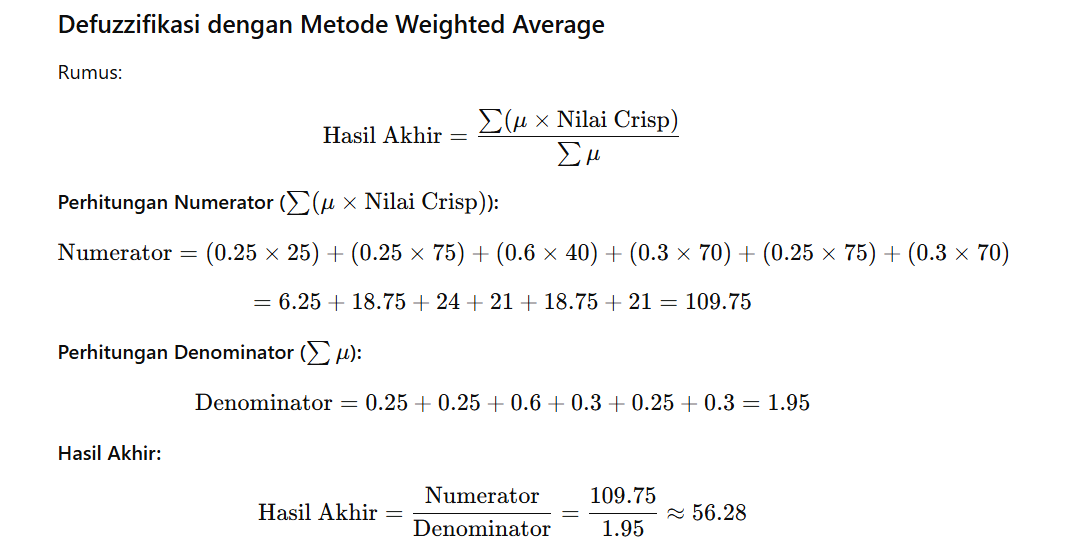

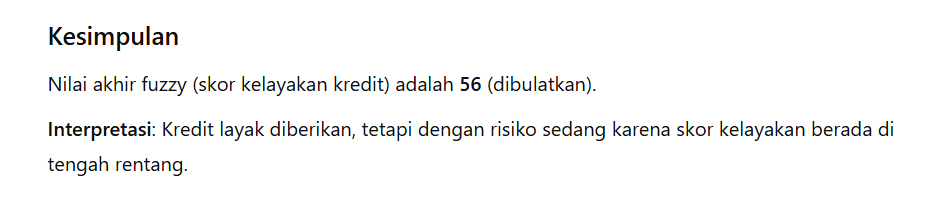

In [14]:
# Instal python-pptx jika belum terpasang
!pip install python-pptx

import io
from pptx import Presentation
from PIL import Image
from IPython.display import display
from google.colab import files

# Fungsi untuk mengonversi PPT ke gambar
def ppt_to_images(ppt_path):
    prs = Presentation(ppt_path)
    slide_images = []

    for i, slide in enumerate(prs.slides):
        for shape in slide.shapes:
            if hasattr(shape, "image"):
                image = shape.image
                image_bytes = io.BytesIO(image.blob)
                image_path = f"slide_{i+1}_{shape.name}.png"
                with open(image_path, "wb") as f:
                    f.write(image_bytes.read())
                slide_images.append(image_path)
    return slide_images

# Unggah file PPT
uploaded = files.upload()

# Nama file yang akan digunakan langsung
ppt_file = "UAS AI.pptx"  # Menggunakan nama file "UAS AI.pptx" langsung

# Ekstrak gambar dari file PowerPoint yang diunggah
slide_images = ppt_to_images(ppt_file)

# Tampilkan gambar
if slide_images:
    for img in slide_images:
        display(Image.open(img))
else:
    print("Tidak ada gambar yang ditemukan pada slide.")


In [1]:
import numpy as np
import matplotlib.pyplot as plt


class Fuzzy:
    def __init__(self):
        self.min = 0
        self.max = 0

    def down(self, x):
        return (self.max - x) / (self.max - self.min)

    def up(self, x):
        return (x - self.min) / (self.max - self.min)

    def rev_down(self, fuzzy_value):
        return self.max - fuzzy_value * (self.max - self.min)

    def rev_up(self, fuzzy_value):
        return fuzzy_value * (self.max - self.min) + self.min


# Variabel Input
class Income(Fuzzy):
    def __init__(self):
        self.min = 2000  # Pendapatan minimum
        self.max = 10000  # Pendapatan maksimum

    def low(self, x):
        if x <= self.min:
            return 1
        if x >= self.max:
            return 0
        return self.down(x)

    def high(self, x):
        if x <= self.min:
            return 0
        if x >= self.max:
            return 1
        return self.up(x)


class Debt(Fuzzy):
    def __init__(self):
        self.min = 0  # Utang minimum
        self.max = 5000  # Utang maksimum

    def low(self, x):
        if x <= self.min:
            return 1
        if x >= self.max:
            return 0
        return self.down(x)

    def high(self, x):
        if x <= self.min:
            return 0
        if x >= self.max:
            return 1
        return self.up(x)


class CreditHistory(Fuzzy):
    def __init__(self):
        self.min = 0  # Skor riwayat kredit minimum
        self.max = 10  # Skor riwayat kredit maksimum

    def poor(self, x):
        if x <= self.min:
            return 1
        if x >= self.max:
            return 0
        return self.down(x)

    def good(self, x):
        if x <= self.min:
            return 0
        if x >= self.max:
            return 1
        return self.up(x)


# Variabel Output
class Creditworthiness(Fuzzy):
    def __init__(self):
        self.min = 0  # Skor kelayakan kredit minimum
        self.max = 100  # Skor kelayakan kredit maksimum

    def low(self, fuzzy_value):
        return self.rev_down(fuzzy_value)

    def high(self, fuzzy_value):
        return self.rev_up(fuzzy_value)


# Aturan Fuzzy
rule_map = {
    ("high", "low", "good"): "high",
    ("high", "high", "poor"): "low",
    ("low", "low", "good"): "low",
    ("low", "high", "poor"): "low",
    ("high", "low", "poor"): "low",
    ("low", "low", "poor"): "low",
}

# Perhitungan
income_value = 4000  # Pendapatan bulanan
debt_value = 2000  # Total utang
credit_history_value = 7  # Skor riwayat kredit

income = Income()
debt = Debt()
credit_history = CreditHistory()
creditworthiness = Creditworthiness()

real_fuzzy_sum = 0
fuzzy_sum = 0

for k, v in rule_map.items():
    fuzzy_income = getattr(income, k[0])(income_value)
    fuzzy_debt = getattr(debt, k[1])(debt_value)
    fuzzy_credit_history = getattr(credit_history, k[2])(credit_history_value)

    fuzzy_output = min(fuzzy_income, fuzzy_debt, fuzzy_credit_history)
    real_output = getattr(creditworthiness, v)(fuzzy_output)

    real_fuzzy_sum += fuzzy_output * real_output
    fuzzy_sum += fuzzy_output

result = int(real_fuzzy_sum / fuzzy_sum)
print(f"Kelayakan Kredit: {result}")


Kelayakan Kredit: 56


In [2]:
income = Income()
debt = Debt()
credit_history = CreditHistory()

# Contoh Input
x = 4000  # Pendapatan bulanan
y = 2000  # Total utang
z = 7     # Skor riwayat kredit

# Perhitungan Keanggotaan untuk Income (Pendapatan)
rendah = income.low(x)
print(f"Himpunan low income: {rendah}")

tinggi = income.high(x)
print(f"Himpunan high income: {tinggi}")

# Perhitungan Keanggotaan untuk Debt (Utang)
rendah_utang = debt.low(y)
print(f"Himpunan low debt: {rendah_utang}")

tinggi_utang = debt.high(y)
print(f"Himpunan high debt: {tinggi_utang}")

# Perhitungan Keanggotaan untuk Credit History (Riwayat Kredit)
buruk = credit_history.poor(z)
print(f"Himpunan poor credit history: {buruk}")

baik = credit_history.good(z)
print(f"Himpunan good credit history: {baik}")


Himpunan low income: 0.75
Himpunan high income: 0.25
Himpunan low debt: 0.6
Himpunan high debt: 0.4
Himpunan poor credit history: 0.3
Himpunan good credit history: 0.7


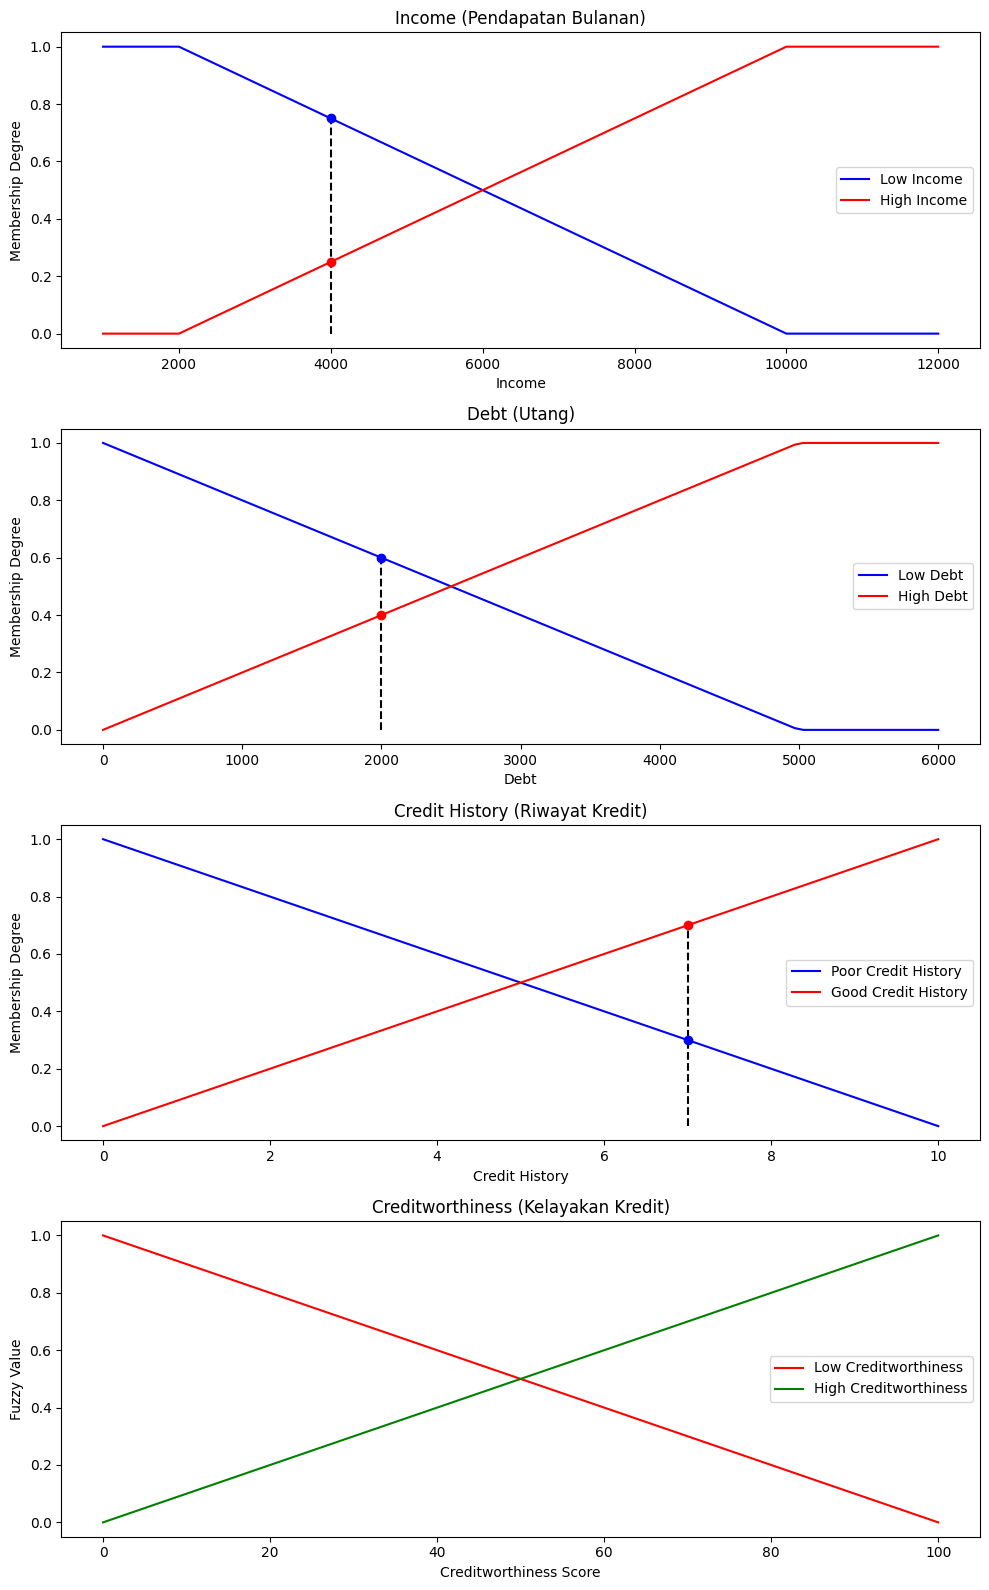

In [4]:
# Hasil keanggotaan
income_value = 4000
debt_value = 2000
credit_history_value = 7

low_income = income.low(income_value)
high_income = income.high(income_value)

low_debt = debt.low(debt_value)
high_debt = debt.high(debt_value)

poor_credit_history = credit_history.poor(credit_history_value)
good_credit_history = credit_history.good(credit_history_value)

# Plotting
fig, axs = plt.subplots(4, 1, figsize=(10, 16))

# Plot untuk Income
axs[0].plot(data_income, [income.low(x) for x in data_income], label='Low Income', color='blue')
axs[0].plot(data_income, [income.high(x) for x in data_income], label='High Income', color='red')
axs[0].plot([income_value, income_value], [0, max(low_income, high_income)], 'k--')  # Garis vertikal
axs[0].scatter(income_value, low_income, color='blue', zorder=5)
axs[0].scatter(income_value, high_income, color='red', zorder=5)
axs[0].set_title('Income (Pendapatan Bulanan)')
axs[0].set_xlabel('Income')
axs[0].set_ylabel('Membership Degree')
axs[0].legend()

# Plot untuk Debt
axs[1].plot(data_debt, [debt.low(x) for x in data_debt], label='Low Debt', color='blue')
axs[1].plot(data_debt, [debt.high(x) for x in data_debt], label='High Debt', color='red')
axs[1].plot([debt_value, debt_value], [0, max(low_debt, high_debt)], 'k--')  # Garis vertikal
axs[1].scatter(debt_value, low_debt, color='blue', zorder=5)
axs[1].scatter(debt_value, high_debt, color='red', zorder=5)
axs[1].set_title('Debt (Utang)')
axs[1].set_xlabel('Debt')
axs[1].set_ylabel('Membership Degree')
axs[1].legend()

# Plot untuk Credit History
axs[2].plot(data_credit_history, [credit_history.poor(x) for x in data_credit_history], label='Poor Credit History', color='blue')
axs[2].plot(data_credit_history, [credit_history.good(x) for x in data_credit_history], label='Good Credit History', color='red')
axs[2].plot([credit_history_value, credit_history_value], [0, max(poor_credit_history, good_credit_history)], 'k--')  # Garis vertikal
axs[2].scatter(credit_history_value, poor_credit_history, color='blue', zorder=5)
axs[2].scatter(credit_history_value, good_credit_history, color='red', zorder=5)
axs[2].set_title('Credit History (Riwayat Kredit)')
axs[2].set_xlabel('Credit History')
axs[2].set_ylabel('Membership Degree')
axs[2].legend()

# Plot untuk Creditworthiness
axs[3].plot(low_credit_values, fuzzy_values, label="Low Creditworthiness", color="red")
axs[3].plot(high_credit_values, fuzzy_values, label="High Creditworthiness", color="green")
axs[3].set_title("Creditworthiness (Kelayakan Kredit)")
axs[3].set_xlabel("Creditworthiness Score")
axs[3].set_ylabel("Fuzzy Value")
axs[3].legend()

# Tampilkan plot
plt.tight_layout()
plt.show()
